In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

In [2]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a*x + b

In [3]:
def surface_pourbaix_bar(cl_at0V,oh_at0V,o_at0V,name):
#  name=name.translate(subscript)
  fig, axs = plt.subplots(2, figsize= (6,5), gridspec_kw={'hspace': 0, 'height_ratios': [30, 1]}) # height_ratios : bar 비율
  fig.suptitle(name, size = 18)


  #plt.title(name,fontsize=16)
  cl=cl_at0V
  oh=oh_at0V
  o=o_at0V
     
  #plt.rcParams["figure.figsize"] = (7,7)

  # create data
  V = np.arange(0,3,0.01)
  G_plane = [0] * len(V)
  G_Cl = -V+cl
  G_oh = -V+oh
  G_o = -2*V+o

  G = np.array([G_plane,G_Cl,G_oh,G_o])

# G_OH > 0 인 경우, OH 생성 x
  G_min = []
  for i in range(len(G_plane)) :
    tem = [G_plane[i],G_Cl[i],G_oh[i],G_o[i]]
    if G_oh[i] > 0 :
        tem[3] = 1
   
    min_val = np.min(tem)
    G_min.append(min_val)

  fi = ['x']*300

  for i in range(len(G_min)) :
    if G_min[i] == G_plane[i] :
      fi[i] = 'black'
    if G_min[i] == G_Cl[i] :
      fi[i] = 'blue'
    if G_min[i] == G_oh[i] :
      fi[i] = 'orange'
    if G_min[i] == G_o[i] :
      fi[i] = 'green'

  # U = 1.23V 일 때 
  for i in range(len(G)):
    if G_min[123] == G[i][123] :
      if i == 0 :
        U123 = 'bare'
      if i == 1 :
        U123 = 'Cl'  
      if i == 2 :
        U123 = 'OH'  
      if i == 3 :
        U123 = 'O'      

  #print(len(fi))
  x = []
  temp = fi[0]
  for i in range(len(fi)) :
    if temp != fi[i] :
        x.append([i,fi[i-1]])
    temp = fi[i]
    
  x.append([len(fi),fi[-1]])
       # plot lines
  axs[0].plot(V,G_plane, label = "*",c='black')
  axs[0].plot(V,G_Cl, label = "Cl")
  axs[0].plot(V,G_oh, label = "OH")
  axs[0].plot(V, G_o, label = "O")
  axs[0].axvline(x=1.23, linestyle='dashed', alpha=0.2,c='gray')
  axs[0].axvline(x=1.36, linestyle='dashed', alpha=0.2,c='gray')

  temp2 = 0
  bh = []
  for i in x :
    bh.append((i[0]-temp2)/100)
    temp2 = i[0]


  #print(x)
  for i in range(len(bh)) :
    axs[1].barh(0,bh[i],left = np.sum(bh[:i]),color = x[i][1],  alpha=.5)

  text_position = (np.min(G_min) + np.max(G_min)) / 2
  th1 = axs[0].text(1.13, text_position, 'OER=1.23V', fontsize=16,rotation=90, rotation_mode='anchor',horizontalalignment='center',multialignment='center',verticalalignment='bottom')
  th1 = axs[0].text(1.56, text_position, 'ClER=1.36V', fontsize=16,rotation=90, rotation_mode='anchor',horizontalalignment='center',multialignment='center',verticalalignment='bottom')

  axs[0].get_xaxis().set_visible(False)
  axs[1].get_yaxis().set_visible(False)
  axs[0].margins(x=0, y=0)
  axs[1].margins(x=0,y=0)
  axs[0].set_ylabel("ΔG(eV)", fontsize=16)
  axs[1].set_xlabel("Applied potentials (V VS. RHE)", fontsize=16)
  axs[0].legend( ncol=3, fontsize=14, frameon=True, shadow=True, loc='upper right')
  axs[1].yaxis.set_visible(False)

  
  return U123
  
  #plt.show()

In [4]:
df = pd.read_excel('test2.xlsx')
p5n4 = df.loc[ (df['#of N'] == 4) & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER','preads']]
p5n3 = df.loc[ (df['#of N'] == 3) & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER','preads']]
p5n2 = df.loc[ (df['#of N'] == 2) & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER','preads']]
p5n1 = df.loc[ (df['#of N'] == 1) & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER','preads']]
p5n0 = df.loc[ (df['#of N'] == 0) & (df['s'] == 'p5') ,  ['s','#of N','M','G_Cl', 'G_O','G_OH','G_OOH','OVER_Cl','Over_OER','preads']]

p5n3 = p5n3.drop(185, axis=0)
p5n3 = p5n3.drop(184, axis=0)
p5n3 = p5n3.drop(189, axis=0)
p5 = [p5n4,p5n3,p5n2,p5n1,p5n0]

p5n4

,s,#of N,M,G_Cl,G_O,G_OH,G_OOH,OVER_Cl,Over_OER,preads
162,p5,4,Ru,0.13,0.79,0.21,3.07,1.23,1.05,bare
163,p5,4,Mn,0.80,1.64,0.89,3.86,0.56,0.99,bare
164,p5,4,Fe,0.86,1.77,0.97,3.78,0.50,0.78,bare
165,p5,4,Co,1.15,2.77,1.36,4.09,0.21,0.18,bare
166,p5,4,Ni,1.83,4.05,2.23,4.81,0.47,1.00,bare
167,p5,4,Cu,1.90,4.50,2.33,4.86,0.54,1.10,bare
168,p5,4,Tc,-0.11,-0.86,-0.22,NaN,1.47,NaN,bare
169,p5,4,Rh,1.03,2.78,1.31,4.10,0.33,0.24,bare
170,p5,4,Pd,2.07,4.80,2.54,4.95,0.71,1.31,bare
171,p5,4,Ag,2.06,4.97,2.71,4.92,0.70,1.48,bare


In [5]:
for i in p5 :
    i["OOH"] = np.where( np.isnan(i["G_OOH"].values) , "O+OH","OOH" )


p5n4 = p5n4[p5n4.OOH == 'OOH' ]
p5n3 = p5n3[p5n3.OOH == 'OOH' ]
p5n2 = p5n2[p5n2.OOH == 'OOH' ]  
p5n1 = p5n1[p5n1.OOH == 'OOH' ]
p5n0 = p5n0[p5n0.OOH == 'OOH' ]



p5 = [p5n4,p5n3,p5n2,p5n1,p5n0]


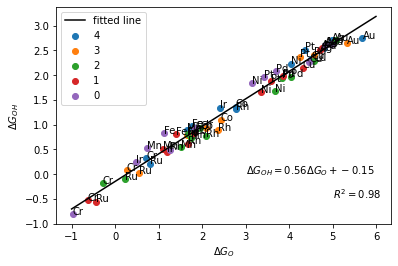

In [6]:
x_n, y_n = np.array([]), np.array([])
for i in p5 :
    plt.scatter(list(i['G_O']),list(i['G_OH']),label=list(i['#of N'])[0]) 
    x_n = np.append(x_n,np.array(i['G_O']))
    y_n = np.append(y_n,np.array(i['G_OH']))
    for j in range(len(i)) :
        plt.text(list(i['G_O'])[j],list(i['G_OH'])[j],list(i['M'])[j])
    #x.append(list(i['G_O']))
    #y.append(list(i['G_Cl']))




plt.xlabel('$ΔG_O$')
plt.ylabel('$ΔG_{OH}$')

res = stats.linregress(x_n, y_n)

x_fit = np.arange(-1,6,0.01)
y_fit = res.intercept + res.slope* x_fit


plt.plot(x_fit,y_fit,label='fitted line',color='black')
plt.text( 3,0 ,'$ΔG_{OH} = %.2f ΔG_O + %.2f $' %(res.slope, res.intercept))
plt.text( 5,-.5 ,'$R^2 = %.2f$' %res.rvalue**2)
plt.legend()

Text(0, 0.5, '$ΔG_{OOH}$')

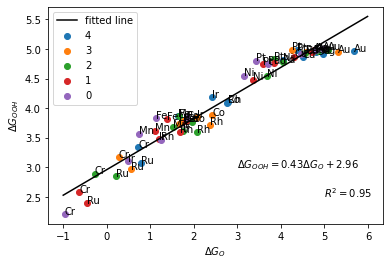

In [7]:
x_n = []
y_n = []
for i in p5 :
    plt.scatter(list(i['G_O']),list(i['G_OOH']),label=list(i['#of N'])[0])
    x_n = np.append(x_n,np.array(i['G_O']))
    y_n = np.append(y_n,np.array(i['G_OOH']))
    for j in range(len(i)) :
        plt.text(list(i['G_O'])[j],list(i['G_OOH'])[j],list(i['M'])[j])
    #x.append(list(i['G_O']))
    #y.append(list(i['G_Cl']))

    
res2 = stats.linregress(x_n, y_n)

x_fit = np.arange(-1,6,0.01)
y_fit = res2.intercept + res2.slope* x_fit


plt.plot(x_fit,y_fit,label='fitted line',color='black')
plt.text( 3,3 ,'$ΔG_{OOH} = %.2f ΔG_O + %.2f $' %(res2.slope, res2.intercept))
plt.text( 5,2.5 ,'$R^2 = %.2f$' %res2.rvalue**2)


plt.legend()
plt.xlabel('$ΔG_O$')
plt.ylabel('$ΔG_{OOH}$')

Text(0, 0.5, '$ΔG_{OOH}$')

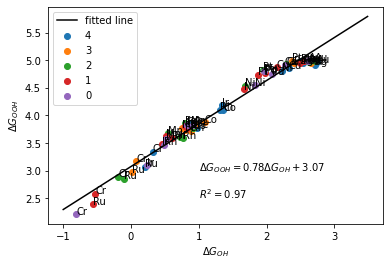

In [8]:
x_n = []
y_n = []
for i in p5 :
    plt.scatter(list(i['G_OH']),list(i['G_OOH']),label=list(i['#of N'])[0])
    x_n = np.append(x_n,np.array(i['G_OH']))
    y_n = np.append(y_n,np.array(i['G_OOH']))
    for j in range(len(i)) :
        plt.text(list(i['G_OH'])[j],list(i['G_OOH'])[j],list(i['M'])[j])
    #x.append(list(i['G_O']))
    #y.append(list(i['G_Cl']))

    
res3 = stats.linregress(x_n, y_n)

x_fit = np.arange(-1,3.5,0.01)
y_fit = res3.intercept + res3.slope* x_fit


plt.plot(x_fit,y_fit,label='fitted line',color='black')
plt.text( 1,3 ,'$ΔG_{OOH} = %.2f ΔG_{OH} + %.2f $' %(res3.slope, res3.intercept))
plt.text( 1,2.5 ,'$R^2 = %.2f$' %res3.rvalue**2)


plt.legend()
plt.xlabel('$ΔG_{OH}$')
plt.ylabel('$ΔG_{OOH}$')

Text(0.5, 3, 'ΔGₒₒₕ = ΔGₒₕ + 2.78')

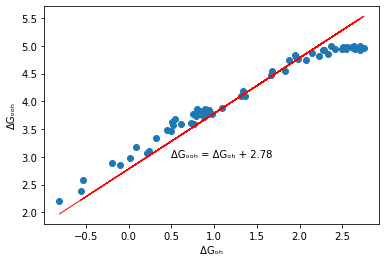

In [9]:
def func2(x, b):
    return x + b

popt, pcov = curve_fit(func2, x_n, y_n)
plt.scatter(x_n,y_n)
plt.plot(x_n, func2(x_n, *popt), color='red', linewidth=1)
plt.ylabel('ΔGₒₒₕ')
plt.xlabel(' ΔGₒₕ ')
plt.text(0.5,3,'ΔGₒₒₕ = ΔGₒₕ + %.2f' %(popt[0]) ) 

Text(0, 0.5, '$ΔG_{Cl}$')

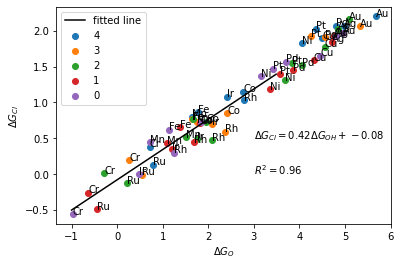

In [10]:
x_n = []
y_n = []
for i in p5 :
    plt.scatter(list(i['G_O']),list(i['G_Cl']),label=list(i['#of N'])[0])
    x_n = np.append(x_n,np.array(i['G_O']))
    y_n = np.append(y_n,np.array(i['G_Cl']))
    for j in range(len(i)) :
        plt.text(list(i['G_O'])[j],list(i['G_Cl'])[j],list(i['M'])[j])
    #x.append(list(i['G_O']))
    #y.append(list(i['G_Cl']))
res4 = stats.linregress(x_n, y_n)

x_fit = np.arange(-1,3.5,0.01)
y_fit = res4.intercept + res4.slope* x_fit


plt.plot(x_fit,y_fit,label='fitted line',color='black')
plt.text( 3,.5 ,'$ΔG_{Cl} = %.2f ΔG_{OH} + %.2f $' %(res4.slope, res4.intercept))
plt.text( 3,0 ,'$R^2 = %.2f$' %res4.rvalue**2)


plt.legend()
plt.xlabel('$ΔG_{O}$')
plt.ylabel('$ΔG_{Cl}$')

Text(0, 0.5, '$η_{OER}$')

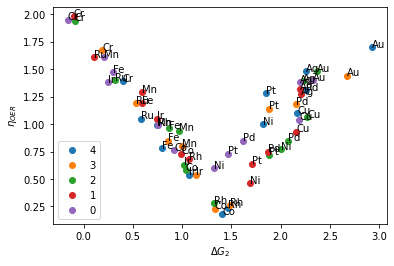

In [11]:
x = []
y = []
for i in p5 :
    plt.scatter(np.array(list(i['G_O']))-np.array(list(i['G_OH'])),list(i['Over_OER']),label=list(i['#of N'])[0])

    for j in range(len(i)) :
        plt.text(list(i['G_O'])[j]-list(i['G_OH'])[j],list(i['Over_OER'])[j],list(i['M'])[j])    
        
#x_OER_fit = np.arange(-.2,3,0.01)
#y_OER_fit1 = (2.78 - x_OER_fit-1.23)
#y_OER_fit2 = x_OER_fit-1.23

#η_OER_fit = np.maximum(y_OER_fit1,y_OER_fit2)
#plt.plot(x_OER_fit , η_OER_fit,c='black',alpha =0.3)

plt.legend()

plt.xlabel('$ΔG_2$')
plt.ylabel('$η_{OER}$')

Text(0, 0.5, '$η_{CER}$')

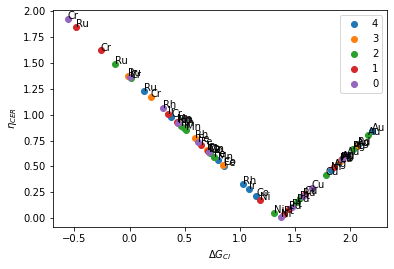

In [12]:
x = []
y = []
for i in p5 :
    plt.scatter(np.array(list(i['G_Cl'])),list(i['OVER_Cl']),label=list(i['#of N'])[0])

    for j in range(len(i)) :
        plt.text(list(i['G_Cl'])[j],list(i['OVER_Cl'])[j],list(i['M'])[j])    
                
plt.legend()

plt.xlabel('$ΔG_{Cl}$')
plt.ylabel('$η_{CER}$')

# Solvation 고려

In [13]:
p5 = [p5n4,p5n3,p5n2,p5n1,p5n0]

for i in p5 :
    i['G_OOH'] = i['G_OOH'] - 0.3
    i['G_OH'] = i['G_OH'] - 0.3
    
    a = list(i['G_OH']-1.23)
    b =list(i['G_O']-i['G_OH']-1.23)
    c = list(i['G_OOH']-i['G_O']-1.23)
    d = list(4.92-i['G_OOH']-1.23)

    i['Over_OER'] = np.max([a,b,c,d],axis=0)

p5n4    

<ipython-input-13-337bf51afdef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['G_OOH'] = i['G_OOH'] - 0.3
<ipython-input-13-337bf51afdef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['G_OH'] = i['G_OH'] - 0.3
<ipython-input-13-337bf51afdef>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

,s,#of N,M,G_Cl,G_O,G_OH,G_OOH,OVER_Cl,Over_OER,preads,OOH
162,p5,4,Ru,0.13,0.79,-0.09,2.77,1.23,0.92,bare,OOH
163,p5,4,Mn,0.80,1.64,0.59,3.56,0.56,0.69,bare,OOH
164,p5,4,Fe,0.86,1.77,0.67,3.48,0.50,0.48,bare,OOH
165,p5,4,Co,1.15,2.77,1.06,3.79,0.21,0.48,bare,OOH
166,p5,4,Ni,1.83,4.05,1.93,4.51,0.47,0.89,bare,OOH
167,p5,4,Cu,1.90,4.50,2.03,4.56,0.54,1.24,bare,OOH
169,p5,4,Rh,1.03,2.78,1.01,3.80,0.33,0.54,bare,OOH
170,p5,4,Pd,2.07,4.80,2.24,4.65,0.71,1.33,bare,OOH
171,p5,4,Ag,2.06,4.97,2.41,4.62,0.70,1.33,bare,OOH
174,p5,4,Ir,1.08,2.41,1.04,3.88,0.28,0.24,bare,OOH


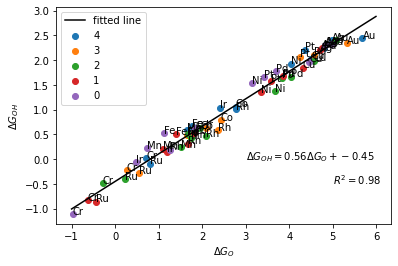

In [14]:
solv_G_O, solv_G_OH = np.array([]), np.array([])
for i in p5 :
    plt.scatter(list(i['G_O']),list(i['G_OH']),label=list(i['#of N'])[0]) 
    solv_G_O = np.append(solv_G_O,np.array(i['G_O']))
    solv_G_OH = np.append(solv_G_OH,np.array(i['G_OH']))
    for j in range(len(i)) :
        plt.text(list(i['G_O'])[j],list(i['G_OH'])[j],list(i['M'])[j])
    #x.append(list(i['G_O']))
    #y.append(list(i['G_Cl']))




plt.xlabel('$ΔG_O$')
plt.ylabel('$ΔG_{OH}$')

solv_res = stats.linregress(solv_G_O, solv_G_OH)

x_fit = np.arange(-1,6,0.01)
y_fit = solv_res.intercept + solv_res.slope* x_fit


plt.plot(x_fit,y_fit,label='fitted line',color='black')
plt.text( 3,0 ,'$ΔG_{OH} = %.2f ΔG_O + %.2f $' %(solv_res.slope, solv_res.intercept))
plt.text( 5,-.5 ,'$R^2 = %.2f$' %solv_res.rvalue**2)
plt.legend()

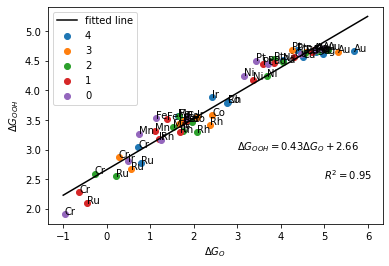

In [25]:
solv_G_OOH = np.array([])
for i in p5 :
    plt.scatter(list(i['G_O']),list(i['G_OOH']),label=list(i['#of N'])[0]) 
    solv_G_OOH = np.append(solv_G_OOH,np.array(i['G_OOH']))
    for j in range(len(i)) :
        plt.text(list(i['G_O'])[j],list(i['G_OOH'])[j],list(i['M'])[j])
    #x.append(list(i['G_O']))
    #y.append(list(i['G_Cl']))




plt.xlabel('$ΔG_O$')
plt.ylabel('$ΔG_{OOH}$')

solv_res2 = stats.linregress(solv_G_O, solv_G_OOH)

x_fit = np.arange(-1,6,0.01)
y_fit = solv_res2.intercept + solv_res2.slope* x_fit


plt.plot(x_fit,y_fit,label='fitted line',color='black')
plt.text( 3,3 ,'$ΔG_{OOH} = %.2f ΔG_O + %.2f $' %(solv_res2.slope, solv_res2.intercept))
plt.text( 5,2.5 ,'$R^2 = %.2f$' %solv_res2.rvalue**2)
plt.legend()

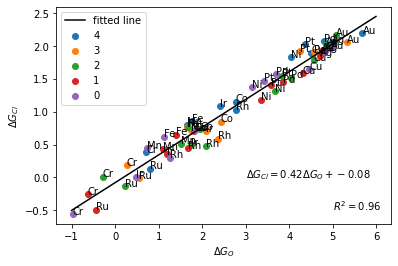

In [16]:
solv_G_Cl = np.array([])
for i in p5 :
    plt.scatter(list(i['G_O']),list(i['G_Cl']),label=list(i['#of N'])[0]) 
    solv_G_Cl = np.append(solv_G_Cl,np.array(i['G_Cl']))
    for j in range(len(i)) :
        plt.text(list(i['G_O'])[j],list(i['G_Cl'])[j],list(i['M'])[j])
    #x.append(list(i['G_O']))
    #y.append(list(i['G_Cl']))




plt.xlabel('$ΔG_O$')
plt.ylabel('$ΔG_{Cl}$')

solv_res3 = stats.linregress(solv_G_O, solv_G_Cl)

x_fit = np.arange(-1,6,0.01)
y_fit = solv_res3.intercept + solv_res3.slope* x_fit


plt.plot(x_fit,y_fit,label='fitted line',color='black')
plt.text( 3,0 ,'$ΔG_{Cl} = %.2f ΔG_O + %.2f $' %(solv_res3.slope, solv_res3.intercept))
plt.text( 5,-.5 ,'$R^2 = %.2f$' %solv_res3.rvalue**2)
plt.legend()

Text(0.5, 3, 'ΔGₒₒₕ = ΔGₒₕ + 2.78')

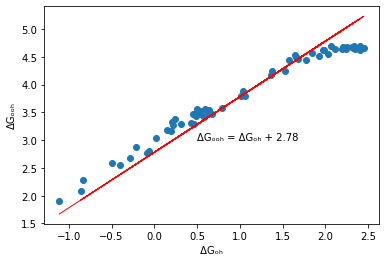

In [26]:
def func2(x, b):
    return x + b

popt, pcov = curve_fit(func2, solv_G_OH, solv_G_OOH)
plt.scatter(solv_G_OH, solv_G_OOH)
plt.plot(solv_G_OH, func2(solv_G_OH, *popt), color='red', linewidth=1)
plt.ylabel('ΔGₒₒₕ')
plt.xlabel(' ΔGₒₕ ')
plt.text(0.5,3,'ΔGₒₒₕ = ΔGₒₕ + %.2f' %(popt[0]) ) 

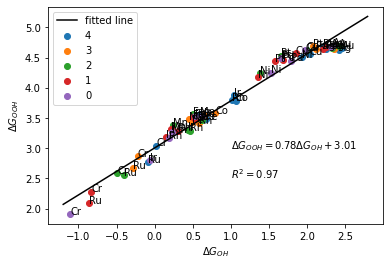

In [32]:
for i in p5 :
    plt.scatter(list(i['G_OH']),list(i['G_OOH']),label=list(i['#of N'])[0]) 
    for j in range(len(i)) :
        plt.text(list(i['G_OH'])[j],list(i['G_OOH'])[j],list(i['M'])[j])
    #x.append(list(i['G_O']))
    #y.append(list(i['G_Cl']))




plt.xlabel('$ΔG_{OH}$')
plt.ylabel('$ΔG_{OOH}$')

solv_res4 = stats.linregress(solv_G_OH, solv_G_OOH)

x_fit = np.arange(-1.2,2.8,0.01)
y_fit = solv_res4.intercept + solv_res4.slope* x_fit


plt.plot(x_fit,y_fit,label='fitted line',color='black')
plt.text( 1,3 ,'$ΔG_{OOH} = %.2f ΔG_{OH} + %.2f $' %(solv_res4.slope, solv_res4.intercept))
plt.text( 1,2.5 ,'$R^2 = %.2f$' %solv_res4.rvalue**2)
plt.legend()

Text(0, 0.5, '$η_{OER}$')

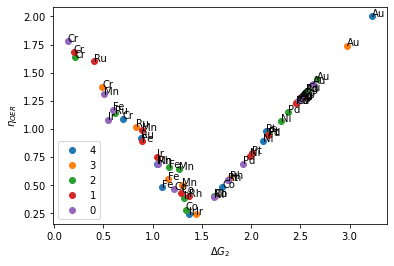

In [18]:
for i in p5 :
    plt.scatter(np.array(list(i['G_O']))-np.array(list(i['G_OH'])),list(i['Over_OER']),label=list(i['#of N'])[0])

    for j in range(len(i)) :
        plt.text(list(i['G_O'])[j]-list(i['G_OH'])[j],list(i['Over_OER'])[j],list(i['M'])[j])    
        
#x_OER_fit = np.arange(-.2,3,0.01)
#y_OER_fit1 = (2.78 - x_OER_fit-1.23)
#y_OER_fit2 = x_OER_fit-1.23

#η_OER_fit = np.maximum(y_OER_fit1,y_OER_fit2)
#plt.plot(x_OER_fit , η_OER_fit,c='black',alpha =0.3)

plt.legend()

plt.xlabel('$ΔG_2$')
plt.ylabel('$η_{OER}$')

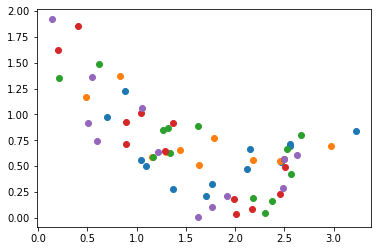

In [38]:
for i in p5 :
    plt.scatter(np.array(list(i['G_O']))-np.array(list(i['G_OH'])),list(i['OVER_Cl']),label=list(i['#of N'])[0])


In [55]:
import matplotlib.cbook as cbook
import matplotlib.cm as cm
x = np.arange(-0.2,3.5,0.01)
y = np.arange(-1.2,3.5,0.01)
X, Y = np.meshgrid(x , y)


Y = np.array(list(reversed(Y)))

Z1 = Y-1.23
Z2 = X-1.23
Z3 = 0.78*Y + 3.01 -1.23
Z4 = 1.23 * 4 - np.array(Z1) - np.array(Z2) - np.array(Z3)
print(Z4+1.23*3)
Z = np.maximum(Z1,Z2,Z3,Z4)


plt.figure(figsize=(12,15))

fig, ax = plt.subplots(1,1)
im = ax.imshow(Z, interpolation='none',extent=[-.2,3.5,-1.2,3.5],cmap='YlOrRd')
cb = plt.colorbar(im,ax=ax,fraction=0.025, pad=0.04)
#cb.set_label('$η_{CER}-η_{OER}$',rotation = 0, y = 1.1 , labelpad = -30)



plt.scatter(np.array(list(i['G_O']))-np.array(list(i['G_OH'])),np.array(list(i['G_OH'])) , marker='.',c='black',s=200)
plt.ylim(-1.2,3.5)
plt.xlabel('$ΔG_2$')
plt.ylabel('$ΔG_{OH}$')

plt.show()


[[ 3.2778  3.2678  3.2578 ... -0.3922 -0.4022 -0.4122]
 [ 3.2956  3.2856  3.2756 ... -0.3744 -0.3844 -0.3944]
 [ 3.3134  3.3034  3.2934 ... -0.3566 -0.3666 -0.3766]
 ...
 [11.5904 11.5804 11.5704 ...  7.9204  7.9104  7.9004]
 [11.6082 11.5982 11.5882 ...  7.9382  7.9282  7.9182]
 [11.626  11.616  11.606  ...  7.956   7.946   7.936 ]]


ValueError: invalid number of arguments